In [ ]:
#authenticatiopn script in gcp
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools

!apt-get install software-properties-common

!apt-get install -y -qq software-properties-common module-init-tools

!apt-get install -y -qq python-software-properties module-init-tools

!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null

!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.12).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.19-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.19-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
##DataFrame has been assigned the name diabetic_data
diabetic_data = pd.read_csv('drive//My Drive//diabetes.csv')
diabetic_data.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
## finding out if there is any null value in the dataset
diabetic_data.isnull().values.any()

False

In [ ]:
diabetic_data.describe()
## To run numerical descriptive stats for the data set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetic= diabetic_data[(diabetic_data.BloodPressure != 0) & (diabetic_data.BMI != 0) & (diabetic_data.Glucose != 0)]
print(diabetic.shape)

(724, 9)


In [ ]:
## Counting cells  with zero values for each variable and showing the value below
(diabetic_data.Pregnancies == 0).sum(),(diabetic_data.Glucose==0).sum(),(diabetic_data.BloodPressure==0).sum(),(diabetic_data.SkinThickness==0).sum(),(diabetic_data.Insulin==0).sum(),(diabetic_data.BMI==0).sum(),(diabetic_data.DiabetesPedigreeFunction==0).sum(),(diabetic_data.Age==0).sum()

(111, 5, 35, 227, 374, 11, 0, 0)

In [ ]:
##creating a dataset called 'diabetic' from original dataset 'diabetic_data' which excludes all rows which have zeros only for Glucose, BP, Skinthickness, Insulin and BMI, as other columns can contain Zero values.
drop_Glu = diabetic_data.index[diabetic_data.Glucose == 0].tolist()
drop_BP = diabetic_data.index[diabetic_data.BloodPressure == 0].tolist()
drop_Skin = diabetic_data.index[diabetic_data.SkinThickness==0].tolist()
drop_Ins = diabetic_data.index[diabetic_data.Insulin==0].tolist()
drop_BMI = diabetic_data.index[diabetic_data.BMI==0].tolist()
c=drop_Glu+drop_BP+drop_Skin+drop_Ins+drop_BMI
diabetic=diabetic_data.drop(diabetic_data.index[c])

In [ ]:
diabetic.info()
##the list has been cleaned up 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    int64  
 2   BloodPressure             392 non-null    int64  
 3   SkinThickness             392 non-null    int64  
 4   Insulin                   392 non-null    int64  
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 30.6 KB


In [ ]:
diabetic.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetic1 = diabetic[diabetic.Outcome==1]
diabetic0 = diabetic[diabetic.Outcome==0]

In [ ]:
diabetic1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
14,5,166,72,19,175,25.8,0.587,51,1
...,...,...,...,...,...,...,...,...,...
732,2,174,88,37,120,44.5,0.646,24,1
740,11,120,80,37,150,42.3,0.785,48,1
748,3,187,70,22,200,36.4,0.408,36,1
753,0,181,88,44,510,43.3,0.222,26,1


In [ ]:
diabetic0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
18,1,103,30,38,83,43.3,0.183,33,0
20,3,126,88,41,235,39.3,0.704,27,0
27,1,97,66,15,140,23.2,0.487,22,0
28,13,145,82,19,110,22.2,0.245,57,0
...,...,...,...,...,...,...,...,...,...
747,1,81,74,41,57,46.3,1.096,32,0
751,1,121,78,39,74,39.0,0.261,28,0
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


Text(0.5, 1.0, 'Count Plot for Outome')

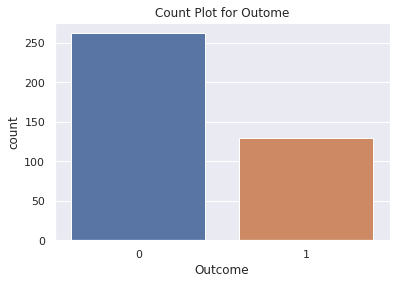

In [ ]:
## graphical analysis of outcome
## creating count plot with title using seaborn
sns.countplot(x=diabetic.Outcome)
plt.title("Count Plot for Outome")

In [ ]:
## computing the percentage of diabetic and non diabetic in the sample data
Out0=len(diabetic[diabetic.Outcome==1])
Out1=len(diabetic[diabetic.Outcome==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0


(66.83673469387755, 33.16326530612245)

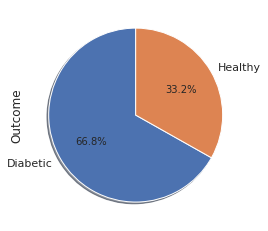

In [ ]:
labels = 'Diabetic' , 'Healthy'
diabetic.Outcome.value_counts().plot.pie(labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)

Text(0.5, 1.0, 'Boxplot for Pregnancies by Outcome')

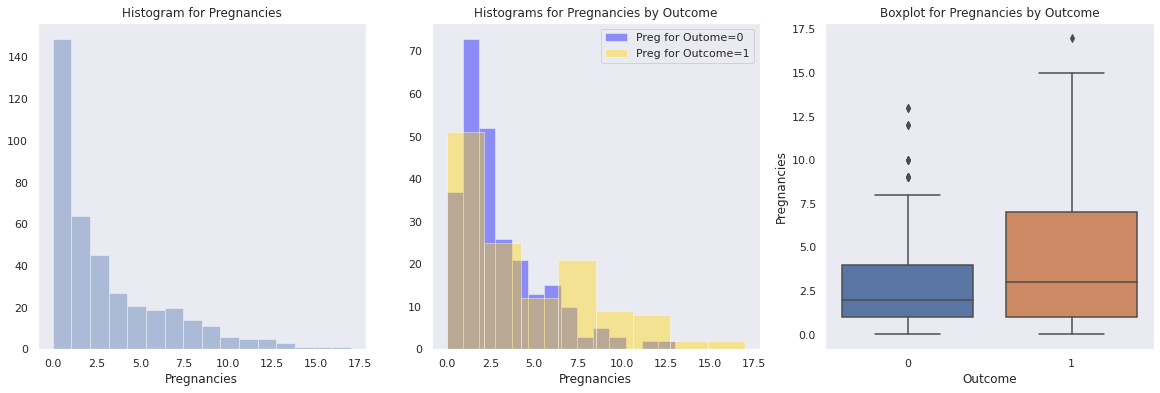

In [ ]:
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
## Screening Variable- Pregnancies
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(diabetic.Pregnancies,kde=False)
plt.subplot(1,3,2)
sns.distplot(diabetic0.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(diabetic1.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Pregnancies by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetic.Outcome,y=diabetic.Pregnancies)
plt.title("Boxplot for Pregnancies by Outcome")

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

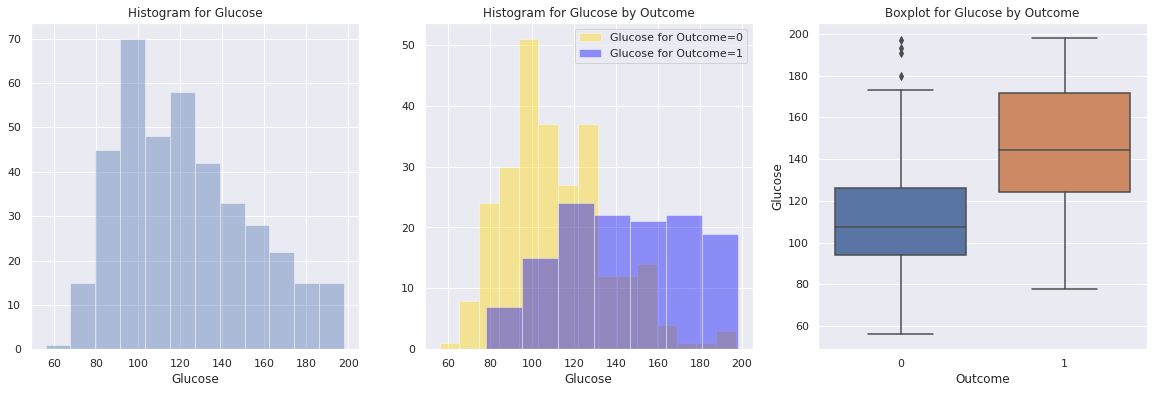

In [ ]:
## Screening Variable - Glucose
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
plt.title("Histogram for Glucose")
sns.distplot(diabetic.Glucose,kde=False)
plt.subplot(1,3,2)
sns.distplot(diabetic0.Glucose,kde=False,color="Gold",label="Glucose for Outcome=0")
sns.distplot(diabetic1.Glucose, kde=False, color="Blue", label = "Glucose for Outcome=1")
plt.title("Histogram for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetic.Outcome,y=diabetic.Glucose)
plt.title("Boxplot for Glucose by Outcome")


Text(0.5, 1.0, 'Boxplot of BP by Outcome')

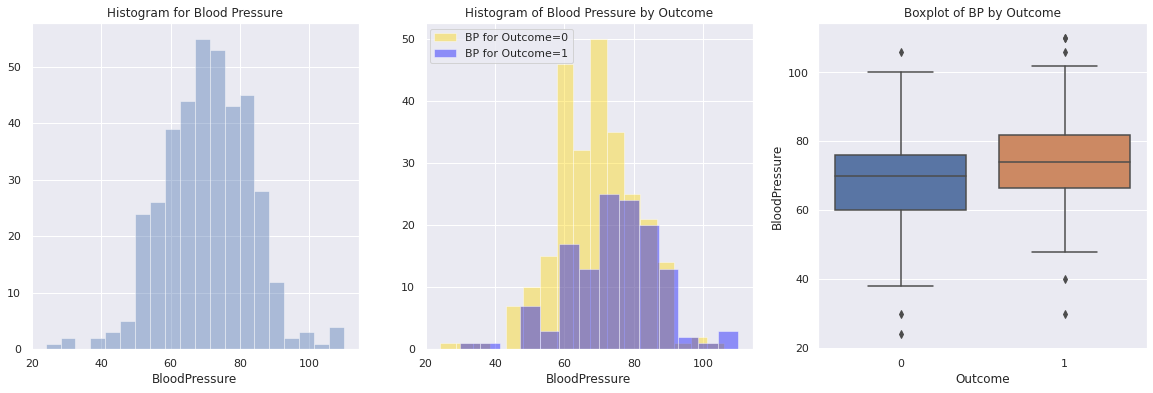

In [ ]:
## Screening Variable - Blood Pressure
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.distplot(diabetic.BloodPressure,kde=False)
plt.title("Histogram for Blood Pressure")
plt.subplot(1,3,2)
sns.distplot(diabetic0.BloodPressure, kde=False, color='Gold', label = "BP for Outcome=0")
sns.distplot(diabetic1.BloodPressure, kde=False, color='Blue', label = "BP for Outcome=1")
plt.legend()
plt.title("Histogram of Blood Pressure by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=diabetic.Outcome,y=diabetic.BloodPressure)
plt.title("Boxplot of BP by Outcome")


Text(0.5, 1.0, 'Boxplot of SkinThickness by Outcome')

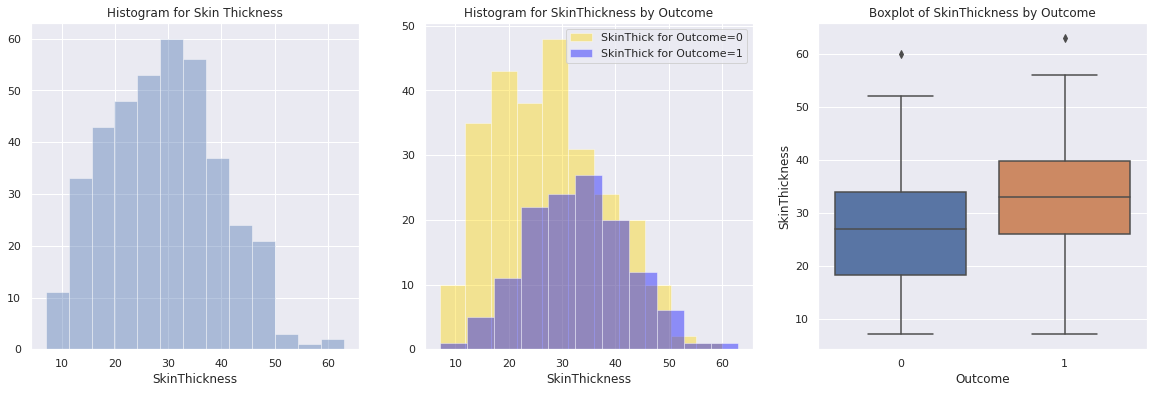

In [ ]:
## screening variable Skin Thickness
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(diabetic.SkinThickness, kde=False)
plt.title("Histogram for Skin Thickness")
plt.subplot(1,3,2)
sns.distplot(diabetic0.SkinThickness, kde=False, color="Gold", label="SkinThick for Outcome=0")
sns.distplot(diabetic1.SkinThickness, kde=False, color="Blue", label="SkinThick for Outcome=1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=diabetic.Outcome, y=diabetic.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")

Text(0.5, 1.0, 'Boxplot for Insulin by Outcome')

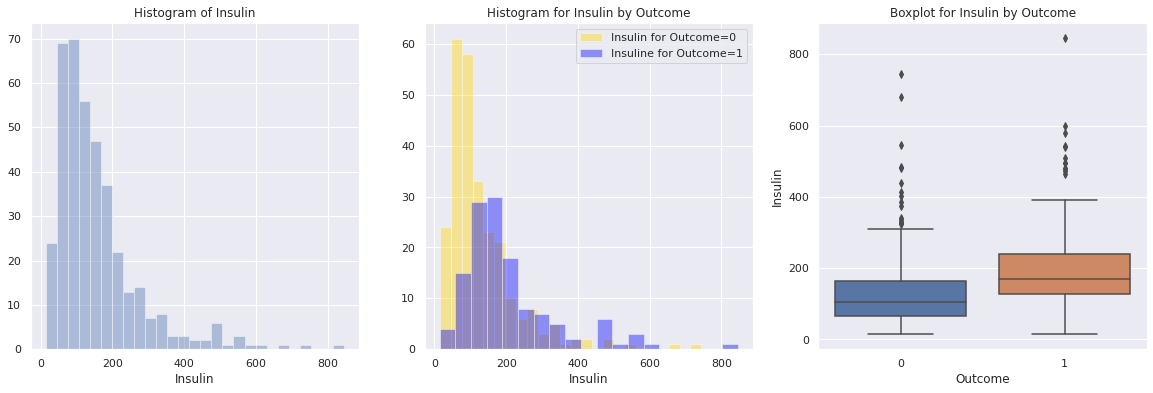

In [ ]:
##screening Variable Insulin
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.distplot(diabetic.Insulin,kde=False)
plt.title("Histogram of Insulin")
plt.subplot(1,3,2)
sns.distplot(diabetic0.Insulin,kde=False, color="Gold", label="Insulin for Outcome=0")
sns.distplot(diabetic1.Insulin,kde=False, color="Blue", label="Insuline for Outcome=1")
plt.title("Histogram for Insulin by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=diabetic.Outcome, y=diabetic.Insulin)
plt.title("Boxplot for Insulin by Outcome")


Text(0.5, 1.0, 'Boxplot for BMI by Outcome')

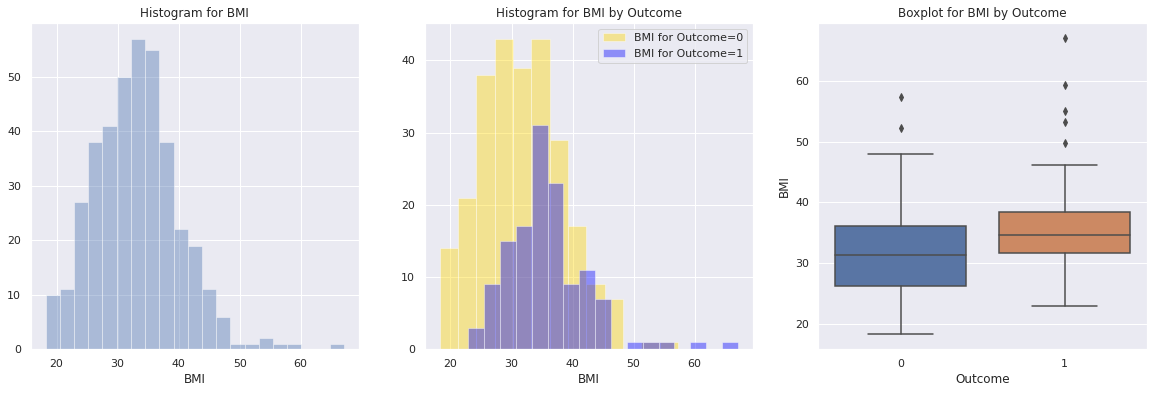

In [ ]:
## screening variable BMI
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(diabetic.BMI, kde=False)
plt.title("Histogram for BMI")
plt.subplot(1,3,2)
sns.distplot(diabetic0.BMI, kde=False,color="Gold", label="BMI for Outcome=0")
sns.distplot(diabetic1.BMI, kde=False, color="Blue", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for BMI by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=diabetic.Outcome, y=diabetic.BMI)
plt.title("Boxplot for BMI by Outcome")

Text(0.5, 1.0, 'Boxplot for DiabetesPedigreeFunction by Outcome')

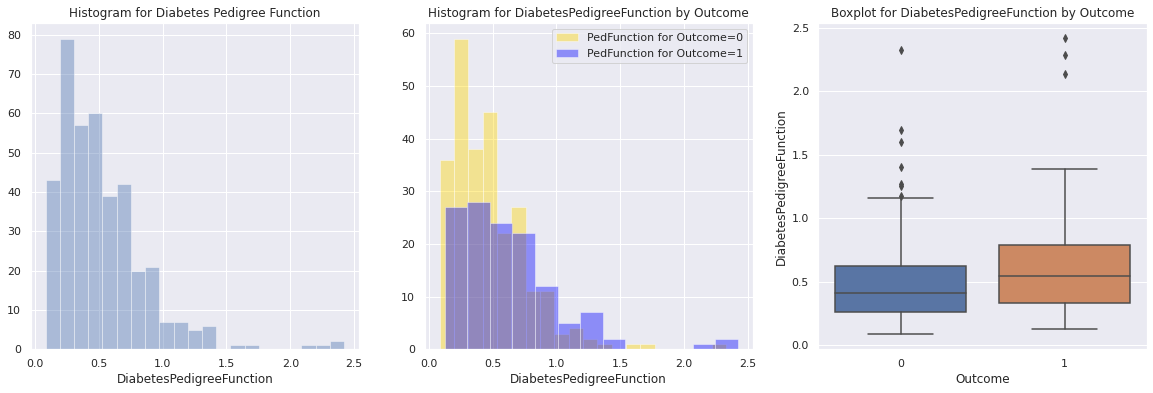

In [ ]:
## screeningvariable Diabetes Pedigree Function
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(diabetic.DiabetesPedigreeFunction,kde=False)
plt.title("Histogram for Diabetes Pedigree Function")
plt.subplot(1,3,2)
sns.distplot(diabetic0.DiabetesPedigreeFunction, kde=False, color="Gold", label="PedFunction for Outcome=0")
sns.distplot(diabetic1.DiabetesPedigreeFunction, kde=False, color="Blue", label="PedFunction for Outcome=1")
plt.legend()
plt.title("Histogram for DiabetesPedigreeFunction by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=diabetic.Outcome, y=diabetic.DiabetesPedigreeFunction)
plt.title("Boxplot for DiabetesPedigreeFunction by Outcome")

Text(0.5, 1.0, 'Boxplot for Age by Outcome')

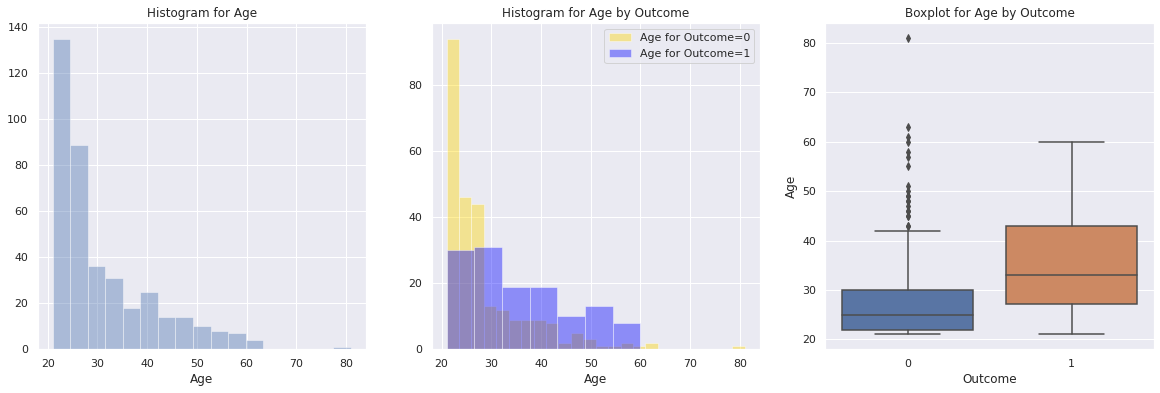

In [ ]:
##screening variable age
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.distplot(diabetic.Age,kde=False)
plt.title("Histogram for Age")
plt.subplot(1,3,2)
sns.distplot(diabetic0.Age,kde=False, color='Gold',label='Age for Outcome=0')
sns.distplot(diabetic1.Age,kde=False,color='Blue', label="Age for Outcome=1")
plt.legend()
plt.title("Histogram for Age by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=diabetic.Outcome,y=diabetic.Age)
plt.title("Boxplot for Age by Outcome")

Text(0.5, 1.0, 'Pairplot of Variables by Outcome')

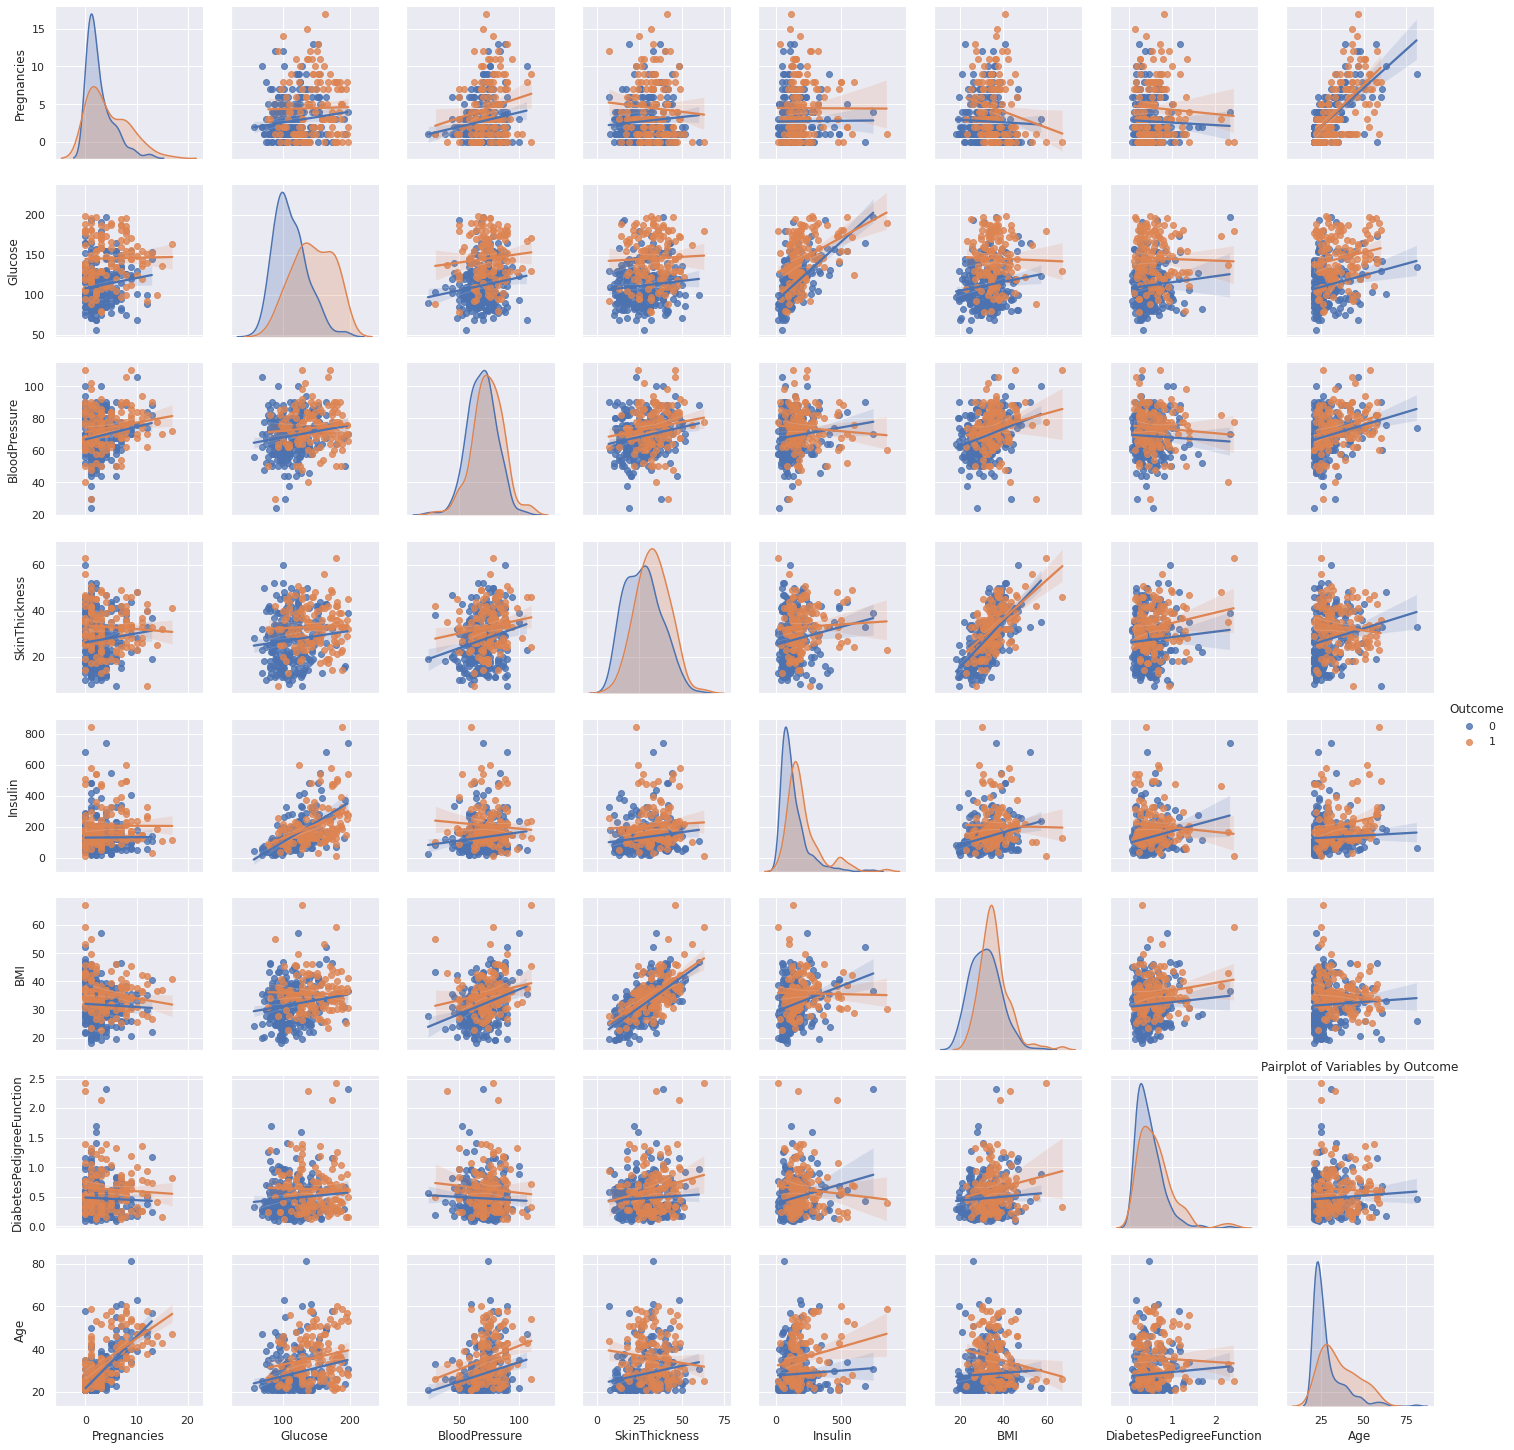

In [ ]:
## screening of association between variabes to study bivariate relationship
sns.pairplot(diabetic, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome", kind='reg')
plt.title("Pairplot of Variables by Outcome")

In [ ]:
cor = diabetic.corr(method ='pearson')
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.198291,0.213355,0.093209,0.078984,-0.025347,0.007562,0.679608,0.256566
Glucose,0.198291,1.000000,0.210027,0.198856,0.581223,0.209516,0.140180,0.343641,0.515703
BloodPressure,0.213355,0.210027,1.000000,0.232571,0.098512,0.304403,-0.015971,0.300039,0.192673
SkinThickness,0.093209,0.198856,0.232571,1.000000,0.182199,0.664355,0.160499,0.167761,0.255936
Insulin,0.078984,0.581223,0.098512,0.182199,1.000000,0.226397,0.135906,0.217082,0.301429
BMI,-0.025347,0.209516,0.304403,0.664355,0.226397,1.000000,0.158771,0.069814,0.270118
DiabetesPedigreeFunction,0.007562,0.140180,-0.015971,0.160499,0.135906,0.158771,1.000000,0.085029,0.209330
Age,0.679608,0.343641,0.300039,0.167761,0.217082,0.069814,0.085029,1.000000,0.350804
Outcome,0.256566,0.515703,0.192673,0.255936,0.301429,0.270118,0.209330,0.350804,1.000000


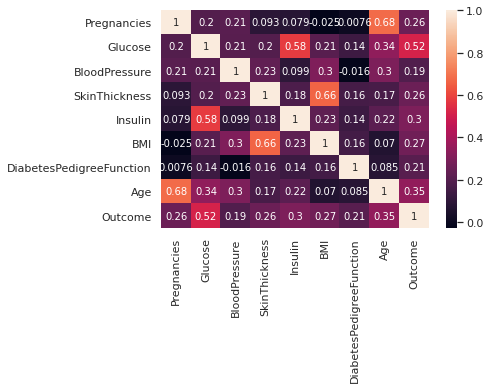

In [ ]:
sns.heatmap(cor,annot=True)

In [ ]:
## Feature Engineering and Model Selction

In [ ]:
Y = diabetic.Outcome
x = diabetic.drop('Outcome', axis = 1)
columns = x.columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)

In [ ]:
from sklearn.linear_model import LogisticRegression
diabetesCheck = LogisticRegression()
diabetesCheck.fit(x_train,y_train)
y_pred = diabetesCheck.predict(x_test)
accuracy = diabetesCheck.score(x_test,y_test)
print ("accuracy = ", accuracy * 100, "%")

accuracy =  83.05084745762711 %


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

Text(0.5, 0, 'Importance')

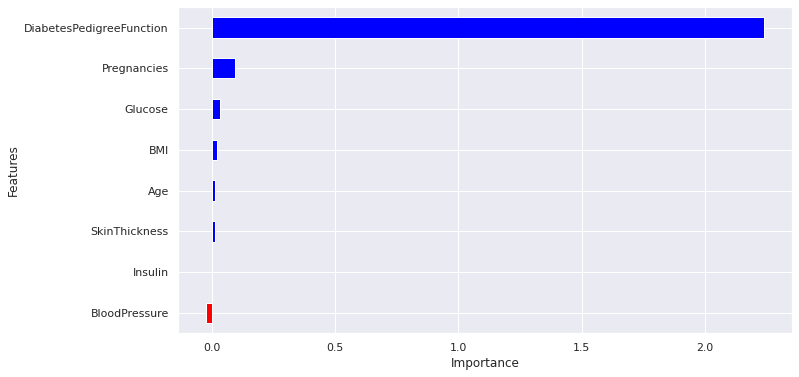

In [ ]:
coeff = list(logreg.coef_[0])
labels = list(columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("F1 Score = ", f1_score(y_test, y_pred, average="macro")*100,"%")
print("Precision Score = ",precision_score(y_test, y_pred, average="macro")*100,"%")
print("Recall Score = ", recall_score(y_test, y_pred, average="macro")*100,"%")


F1 Score =  81.51629072681705 %
Precision Score =  84.68834688346884 %
Recall Score =  80.47619047619048 %


In [ ]:
## Model Selection, importing seven different classifiers to test for most accurate model for use
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection 
from sklearn.model_selection import StratifiedKFold


In [ ]:
 ## initialize the classifier models with their default parameters and add them to a model list
 models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [ ]:
## Evaluation for best performing model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [ ]:
## split the features into 'train' and 'test' portions then stratify 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = diabetic.Outcome,test_size=0.2, random_state=0)

In [ ]:
## fit each model in a loop and calculate the accuracy_score
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

In [ ]:
names = []
scores = []
for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=10) 
    score = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

  Name     Score
0  KNN  0.734615
1  SVC  0.765192
2   LR  0.790577
3   DT  0.750321
4  GNB  0.772756
5   RF  0.793269
6   GB  0.785833


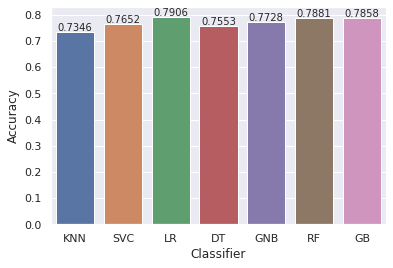

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


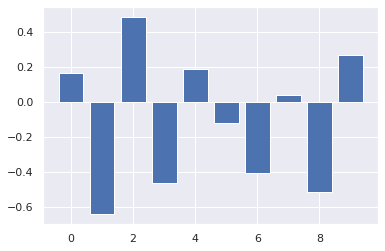

In [ ]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
x, Y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
logreg = LogisticRegression()
# fit the model
logreg.fit(x,Y)
# get importance
importance = logreg.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[127  30]
 [ 27 116]]


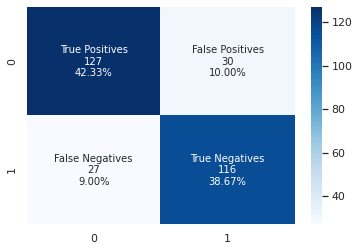

In [ ]:
group_names = ['True Positives','False Positives','False Negatives','True Negatives']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
## Importing stats models for running logistic regression
import statsmodels.api as sm
## Defining the model and assigning Y (Dependent) and x1 (Important selected independent variables)
important_features = ["DiabetesPedigreeFunction", "Pregnancies", "Glucose", "BMI","Age", "SkinThickness"]
x1= diabetic[important_features]
logit_model=sm.Logit(Y,x1)
## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.609267
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      386
Method:                           MLE   Df Model:                            5
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                 0.04102
Time:                        14:13:54   Log-Likelihood:                -238.83
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                  0.001036
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
DiabetesPedigreeFunction     0.5302      0.327      1.622      0.105      -0.110

In [ ]:
important_features2=["Pregnancies", "Glucose","BMI", "SkinThickness"]
x2=diabetic[important_features2]

In [ ]:
logit_model=sm.Logit(Y,x2)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.616007
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  392
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            3
Date:                Mon, 01 Jun 2020   Pseudo R-squ.:                 0.03041
Time:                        14:17:45   Log-Likelihood:                -241.47
converged:                       True   LL-Null:                       -249.05
Covariance Type:            nonrobust   LLR p-value:                  0.001694
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Pregnancies       0.0721      0.034      2.100      0.036       0.005       0.139
Glucose           0.

In [ ]:
Feature_names3=["Pregnancies", "Glucose","BMI"]
X2=diabetic[Feature_names3]
logit_model=sm.Logit(Y,X2)
result=logit_model.fit()
print(result.summary())

In [ ]:
Feature_names4=["Pregnancies", "Glucose","BloodPressure"]
X4=diabetic[Feature_names4]
logit_model=sm.Logit(y,X4)
result=logit_model.fit()
print(result.summary())

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


In [ ]:
y_pred = logreg.predict(X_test)
accuracy = logreg.score(X_test,y_test)
print ("accuracy = ", accuracy * 100, "%")

accuracy =  81.0 %


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
## Calculating the precision of the model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       157
           1       0.79      0.81      0.80       143

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



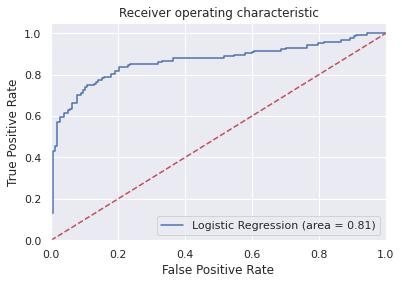

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [ ]:
from sklearn.feature_selection import RFE
model = logreg
rfe = RFE(model,8)
fit = rfe.fit(x,Y)
print("Number of Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Number of Features: 8
Selected Features: [ True  True  True  True  True  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
feature_importance = list(zip(x, fit.support_))
new_features = []
for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [ ]:
import joblib
joblib.dump([logreg], 'DiabetesModel')

['DiabetesModel']

In [ ]:
diabetesLoadedModel = joblib.load('DiabetesModel')

In [ ]:
SampleData = pd.read_excel('drive//My Drive//testdata.xlsx')
dfCheck = SampleData
dfCheck.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,78,50,32,88,31.0,0.248,26,1
1,5,166,72,19,175,25.8,0.587,51,1
2,1,89,66,23,94,28.1,0.167,21,0
3,1,85,66,29,0,26.6,0.351,31,0


In [ ]:
SampleData = dfCheck[:1]
SampleDataFeatures = np.asarray(SampleData.drop('Outcome',1))
SampleDataFeatures = (SampleDataFeatures - means)/SampleDataFeatures
PredictionProbability = DiabetesLoadedModel.predict_proba(SampleDataFeatures)
Prediction = DiabetesLoadedModel.predict(SampleDataFeatures)
print('Probability:', PredictionProbability)
print('Prediction :', Prediction)

NameError: ignored